In [3]:
import pandas as pd 
import numpy as np

In [4]:
train = pd.read_csv("./Train.csv")
train

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.0000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.0000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1.0,1.0,"Blank, Mr. Henry",male,40.0,0.0,0.0,112277,31.0000,A31,C,7,NaN,"Glen Ridge, NJ"
1005,3.0,0.0,"Laitinen, Miss. Kristina Sofia",female,37.0,0.0,0.0,4135,9.5875,NaN,S,NaN,NaN,NaN
1006,1.0,1.0,"Newell, Miss. Marjorie",female,23.0,1.0,0.0,35273,113.2750,D36,C,6,NaN,"Lexington, MA"
1007,3.0,1.0,"Nicola-Yarred, Master. Elias",male,12.0,1.0,0.0,2651,11.2417,NaN,C,C,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [6]:
# drop body, boat, cabin,home.dest
train.drop(labels=['body','boat','home.dest','cabin'], axis= 1, inplace= True)
# we will also drop 'names' , 'embarked' and 'ticket' as it wont help us in our classification 
train.drop(labels=['name', 'ticket', 'embarked'], axis= 1, inplace= True)
train

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,NaN,0.0,0.0,7.7500
1,2.0,0.0,male,39.0,0.0,0.0,26.0000
2,2.0,1.0,female,40.0,0.0,0.0,13.0000
3,3.0,1.0,female,31.0,1.0,1.0,20.5250
4,3.0,1.0,female,NaN,2.0,0.0,23.2500
...,...,...,...,...,...,...,...
1004,1.0,1.0,male,40.0,0.0,0.0,31.0000
1005,3.0,0.0,female,37.0,0.0,0.0,9.5875
1006,1.0,1.0,female,23.0,1.0,0.0,113.2750
1007,3.0,1.0,male,12.0,1.0,0.0,11.2417


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   object 
 3   age       812 non-null    float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1008 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


In [8]:
# as you see from info method above, age has (1009-812)-> 197 missing data! lets fill it by avaeage age 
train['age'] = train['age'].fillna(0)

# now take the average of ages 
m = np.mean( train['age'] ) 

# replace the 0 with the average 
train['age'] = train['age'].replace(0, m)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   object 
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1008 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


In [10]:
# we still have one missing data in 'fare' and 'embark'
train['fare'] = train['fare'].fillna(np.mean( train['fare']))


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   object 
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


In [12]:
# Now we do not have any missing data 

In [13]:
# lets label encode our "sex" column and "embarked"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['sex'] = le.fit_transform(train['sex'])


In [14]:
# except "Survived Column" i need all other as X
X = train.loc[:, train.columns != 'survived']
X

,pclass,sex,age,sibsp,parch,fare
0,3.0,0,24.013132,0.0,0.0,7.7500
1,2.0,1,39.000000,0.0,0.0,26.0000
2,2.0,0,40.000000,0.0,0.0,13.0000
3,3.0,0,31.000000,1.0,1.0,20.5250
4,3.0,0,24.013132,2.0,0.0,23.2500
...,...,...,...,...,...,...
1004,1.0,1,40.000000,0.0,0.0,31.0000
1005,3.0,0,37.000000,0.0,0.0,9.5875
1006,1.0,0,23.000000,1.0,0.0,113.2750
1007,3.0,1,12.000000,1.0,0.0,11.2417


In [15]:
X = X.values

In [16]:
y = train.loc[:,  train.columns == 'survived']
y 

,survived
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
1004,1.0
1005,0.0
1006,1.0
1007,1.0


In [17]:
y = y.values.astype('int')
y

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

## to split our data for training and testing 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=2)

### To create and train our model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 5)

In [47]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [48]:
y_pred = dt.predict(X_test)

### To valideate our mode

In [49]:
from sklearn.metrics import accuracy_score
print(f'the accuracy of the model is , {accuracy_score(y_test, y_pred)*100} percent ' )

the accuracy of the model is , 85.14851485148515 percent 


### to plot our decission tree
    

In [50]:
from sklearn.tree import plot_tree


## here if i directly plot my tree will be very small to increase the tree size 

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,80

[Text(2046.0, 3986.4, 'X[1] <= 0.5\nentropy = 0.957\nsamples = 908\nvalue = [564, 344]'),
 Text(967.2, 3261.6000000000004, 'X[0] <= 2.5\nentropy = 0.878\nsamples = 326\nvalue = [97, 229]'),
 Text(396.8, 2536.8, 'X[5] <= 31.681\nentropy = 0.386\nsamples = 172\nvalue = [13, 159]'),
 Text(198.4, 1812.0, 'X[2] <= 21.5\nentropy = 0.631\nsamples = 63\nvalue = [10, 53]'),
 Text(99.2, 1087.1999999999998, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(297.6, 1087.1999999999998, 'X[5] <= 31.34\nentropy = 0.699\nsamples = 53\nvalue = [10, 43]'),
 Text(198.4, 362.39999999999964, 'entropy = 0.665\nsamples = 52\nvalue = [9, 43]'),
 Text(396.8, 362.39999999999964, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(595.2, 1812.0, 'X[5] <= 149.035\nentropy = 0.182\nsamples = 109\nvalue = [3, 106]'),
 Text(496.0, 1087.1999999999998, 'entropy = 0.0\nsamples = 84\nvalue = [0, 84]'),
 Text(694.4, 1087.1999999999998, 'X[5] <= 152.506\nentropy = 0.529\nsamples = 25\nvalue = [3, 22]'),
 Text(595.2, 

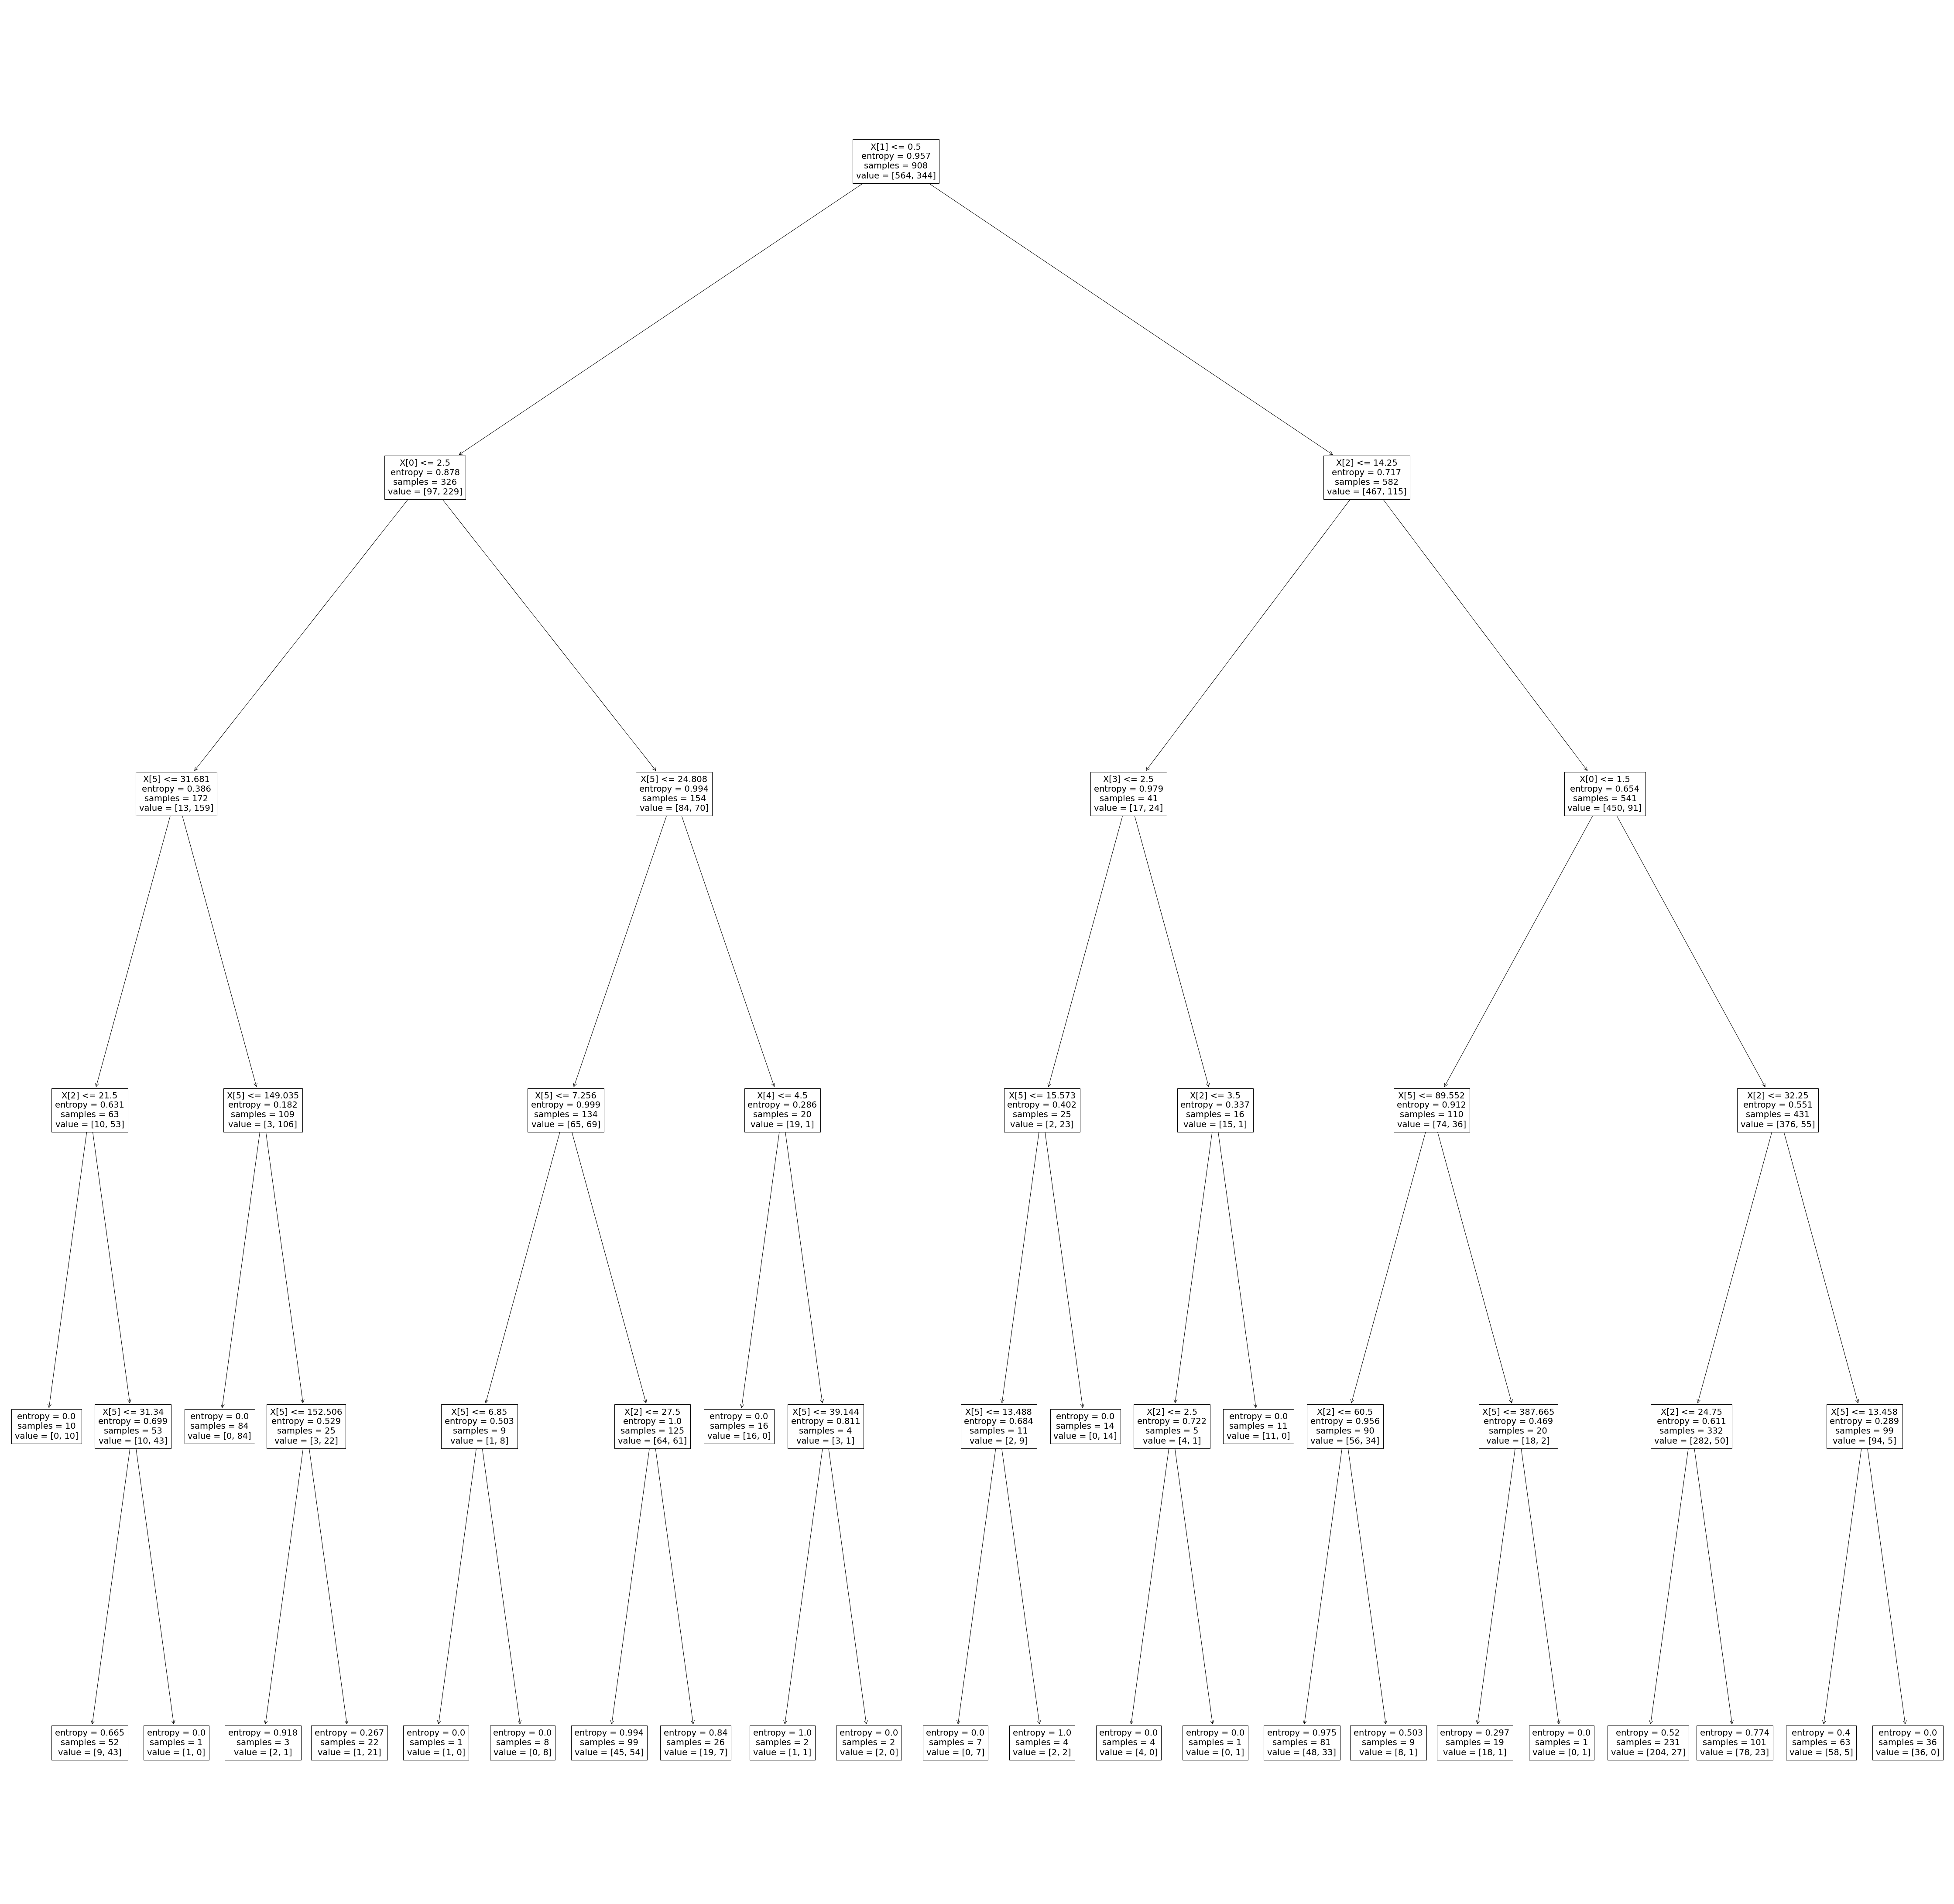

In [51]:
plot_tree(dt)

### Now to get predictions from external data 

In [52]:
test = pd.read_csv("./Test.csv")
test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0.0,0.0,PC 17474,26.3875,E25,S,5,NaN,"Brooklyn, NY"
1,3.0,"Sage, Miss. Constance Gladys",female,NaN,8.0,2.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
2,1.0,"Rood, Mr. Hugh Roscoe",male,NaN,0.0,0.0,113767,50.0000,A32,S,NaN,NaN,"Seattle, WA"
3,2.0,"Gillespie, Mr. William Henry",male,34.0,0.0,0.0,12233,13.0000,NaN,S,NaN,NaN,"Vancouver, BC"
4,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0.0,0.0,248740,13.0000,NaN,S,NaN,NaN,"Helsinki, Finland Ashtabula, Ohio"


In [53]:
# we want only those labels that are in our trainig data set !!! 

In [54]:
labels_needed = np.array(train.columns)
labels_needed

array(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare'],
      dtype=object)

In [55]:
test.drop(labels=['name','cabin','boat','body','home.dest','ticket','embarked'], axis=1, inplace= True)

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    object 
 2   age     234 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.2+ KB


In [57]:
## Now to fill NAn
test['age'] = test['age'].fillna(np.mean(test['age']))  # fill age by mean of ages


In [58]:
# as you see below we have no nan values 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    object 
 2   age     300 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.2+ KB


In [59]:
# now to label encode "sex" and "embark"


test['sex'] = le.fit_transform(test['sex'])

In [60]:
test.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,1,36.000000,0.0,0.0,26.3875
1,3.0,0,30.027422,8.0,2.0,69.5500
2,1.0,1,30.027422,0.0,0.0,50.0000
3,2.0,1,34.000000,0.0,0.0,13.0000
4,2.0,1,28.000000,0.0,0.0,13.0000


In [61]:
X_testing = test.values

In [62]:
X_testing

array([[ 1.        ,  1.        , 36.        ,  0.        ,  0.        ,
        26.3875    ],
       [ 3.        ,  0.        , 30.02742179,  8.        ,  2.        ,
        69.55      ],
       [ 1.        ,  1.        , 30.02742179,  0.        ,  0.        ,
        50.        ],
       ...,
       [ 3.        ,  1.        , 13.        ,  4.        ,  2.        ,
        31.3875    ],
       [ 3.        ,  1.        , 30.02742179,  2.        ,  0.        ,
        21.6792    ],
       [ 3.        ,  0.        , 30.02742179,  0.        ,  0.        ,
         7.75      ]])

In [63]:
## now to perform prediction 

In [64]:
survived = dt.predict(X_testing)

In [65]:
survived = pd.DataFrame({"survived":survived})

In [66]:
survived

,survived
0,0
1,0
2,0
3,0
4,0
...,...
295,0
296,1
297,0
298,0


In [67]:
# converting to csv  and save

In [68]:
survived.to_csv("./survived.csv")